In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

Path to dataset files: /Users/student/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


In [68]:
import pandas as pd
import os

data_path = r"/Users/student/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2"

files = os.listdir(data_path)
print("file list:", files)

file list: ['2019.csv', '2018.csv', '2015.csv', '2016.csv', '2017.csv']


In [69]:
happiness_2015 = pd.read_csv(data_path+r"/2015.csv")
print(happiness_2015.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# read data in URL
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, skiprows=22, header=None, sep='\\s+')

# Connect two lines at a time
raw = raw_df.values
x = np.concatenate([raw[::2, :], raw[1::2, :2]], axis=1)
y = raw[1::2, 2]
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
boston = pd.DataFrame(np.column_stack([x, y]), columns=columns)

In [71]:
print(boston.head())
print("--------------------------------")
print(boston.info())
print("--------------------------------")
print(boston.describe())
print("--------------------------------")
print(boston.isnull().sum())
print("--------------------------------")
print(boston.columns)
print("--------------------------------")
print(boston.index)
print("--------------------------------")
print(boston.shape)
print("--------------------------------")
print(boston.dtypes)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null   

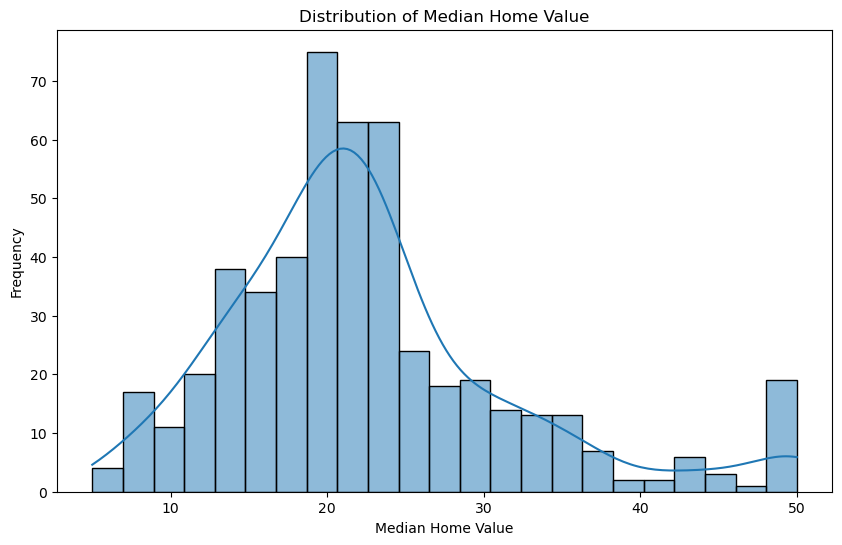

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(boston['MEDV'], kde=True)
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()

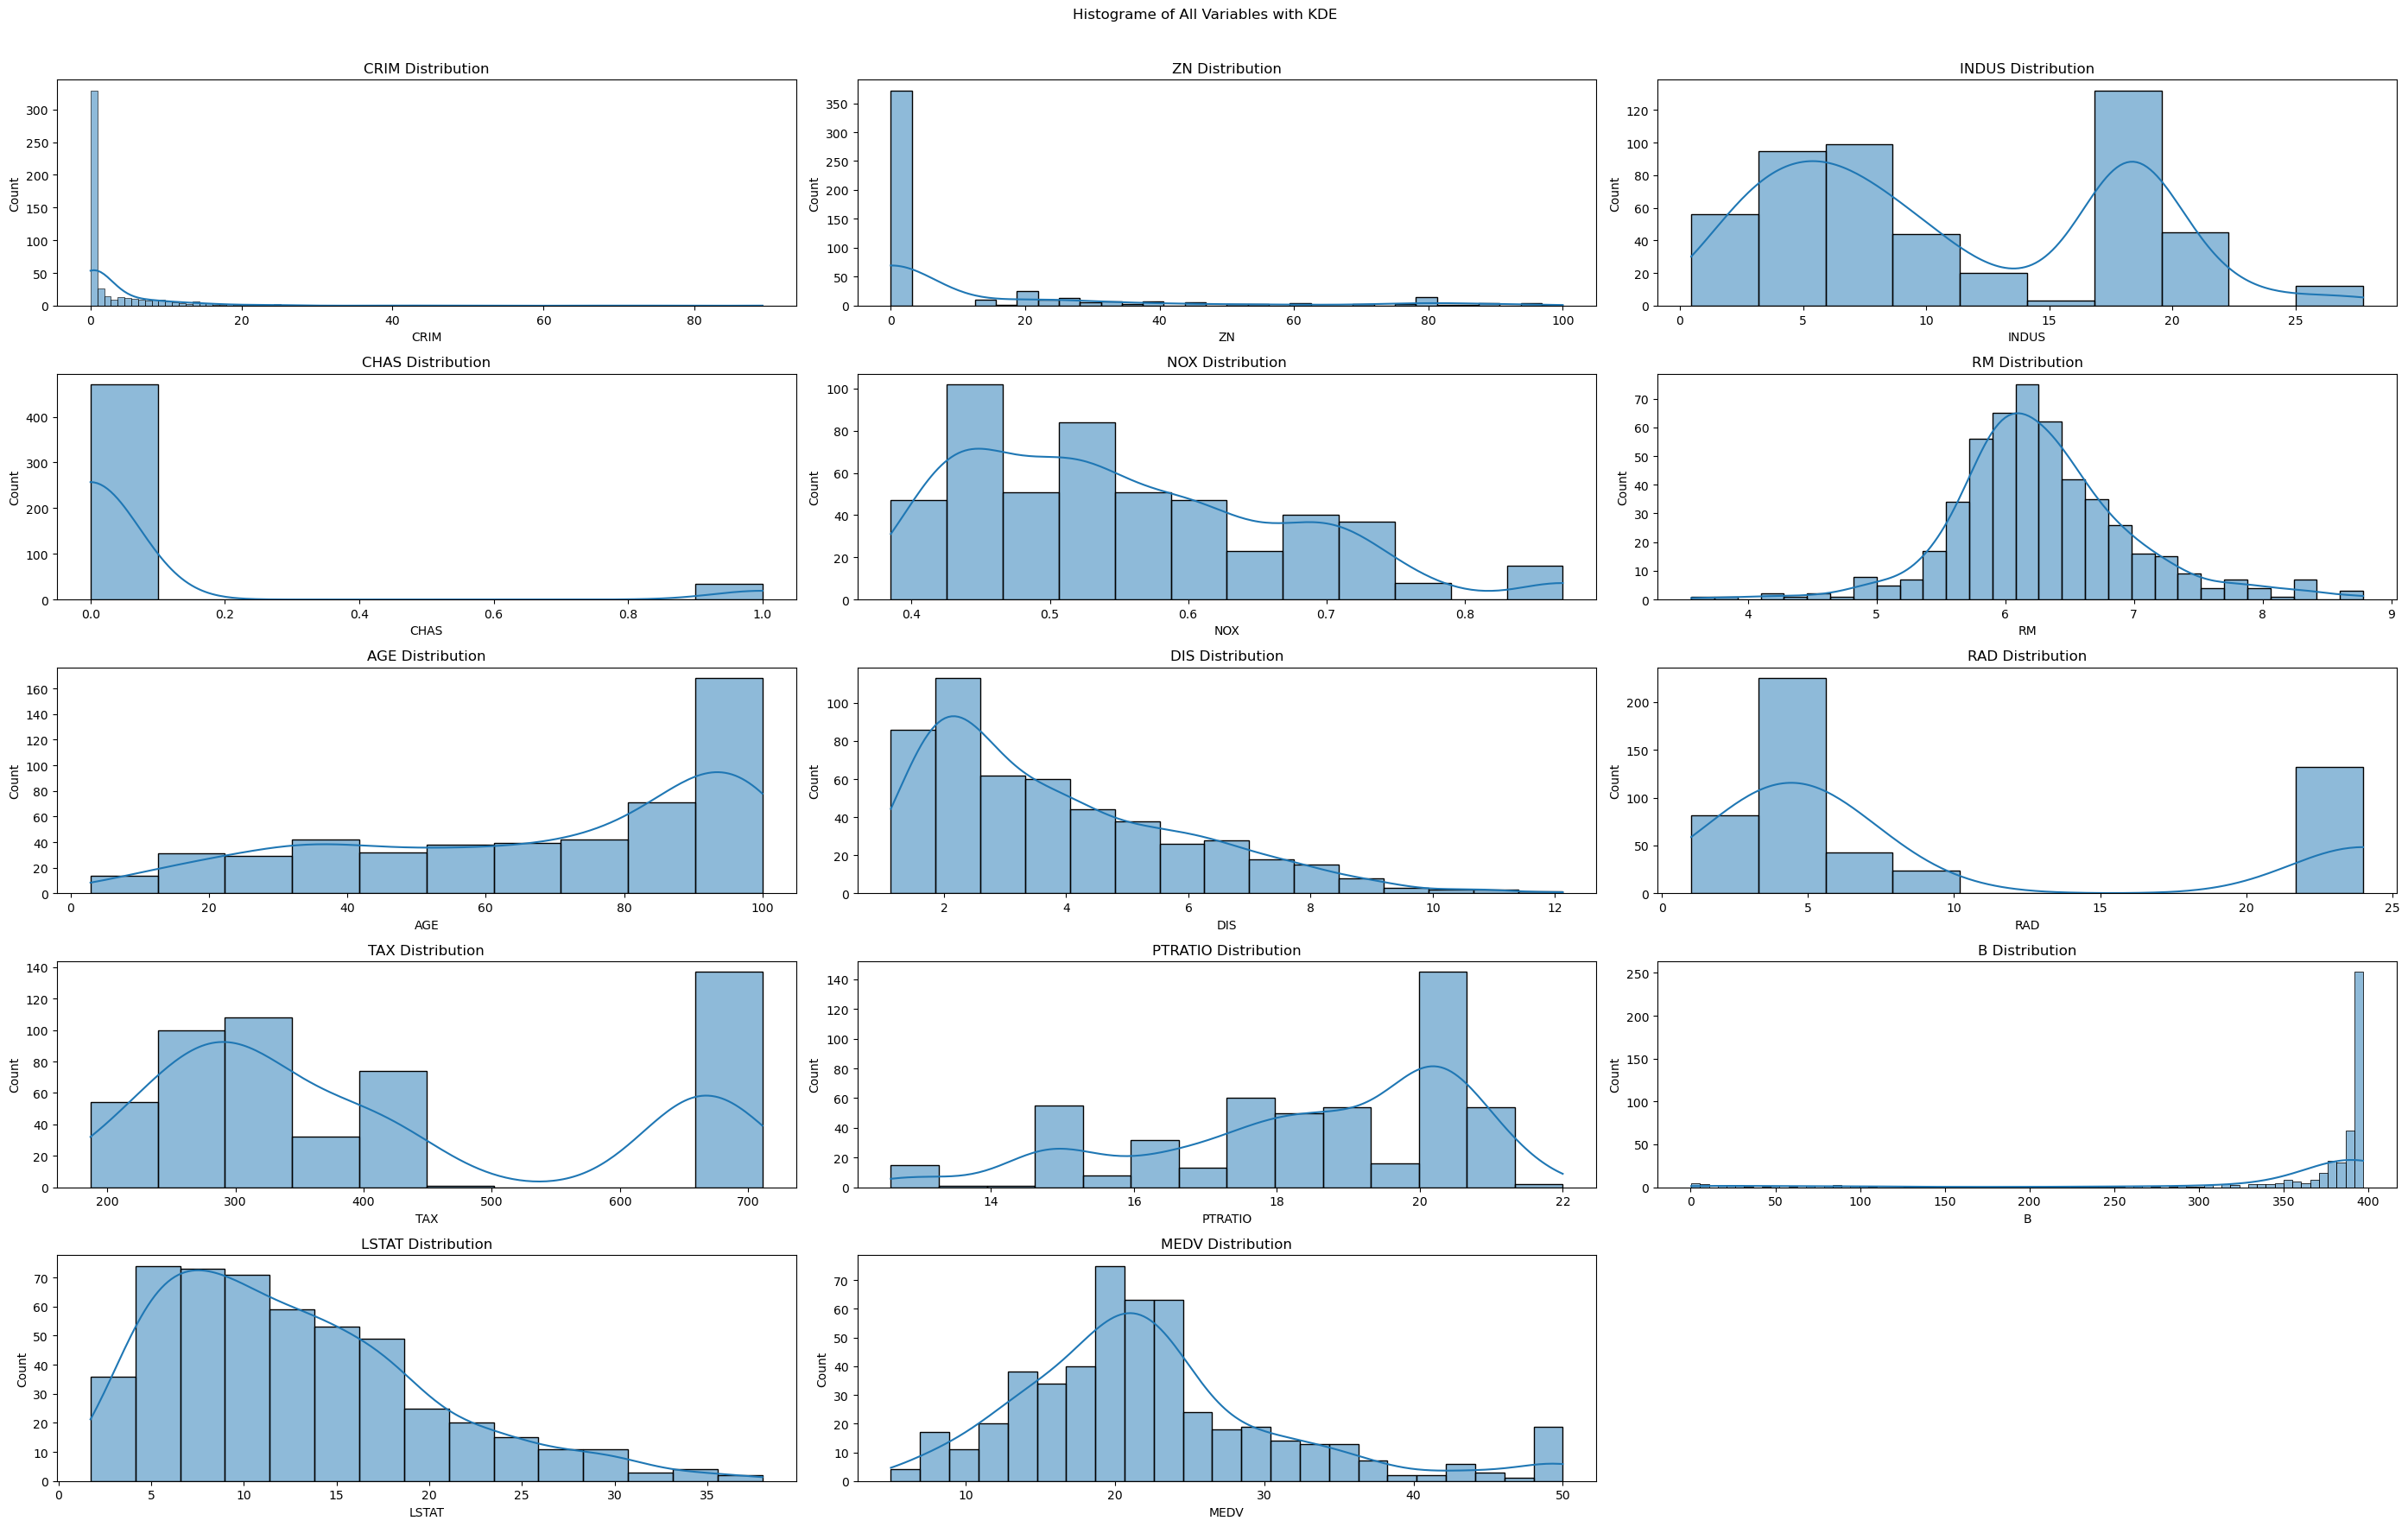

In [73]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 18))
fig.suptitle('Histograme of All Variables with KDE')

ax = axes.flatten()

for i, col in enumerate(boston.columns):
    sns.histplot(boston[col], kde=True, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

ax[-1].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

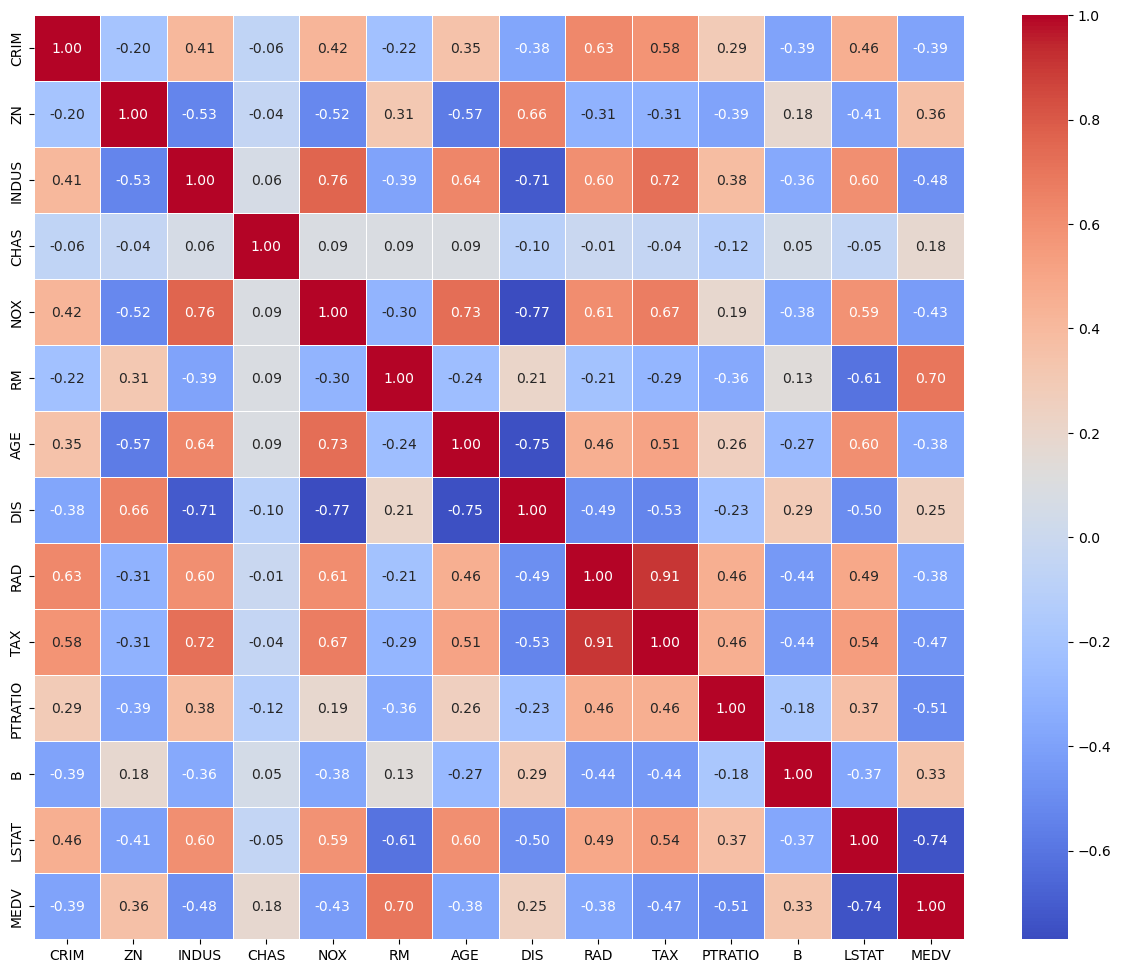

In [74]:
plt.figure(figsize=(15, 12))
correlation_matrix = boston.corr().round(2)
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f',
)
plt.show()

In [75]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_scaler_model = RandomForestRegressor(n_estimators=100)
rf_scaler_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
rf_predictions = rf_model.predict(X_test)
rf_scaler_predictions = rf_scaler_model.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

rf_scaler_mae = mean_absolute_error(y_test, rf_scaler_predictions)
rf_scaler_rmse = np.sqrt(mean_squared_error(y_test, rf_scaler_predictions))
rf_scaler_r2 = r2_score(y_test, rf_scaler_predictions)

rf_scaler_results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest with Scaler'],
    'MAE': [rf_mae, rf_scaler_mae],
    'RMSE': [rf_rmse, rf_scaler_rmse],
    'R2': [rf_r2, rf_scaler_r2]
})

error_comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Predicted': rf_predictions,
    'RF_Scaler_Predicted': rf_scaler_predictions,
    'RF_Error': y_test - rf_predictions,
    'RF_Scaler_Error': y_test - rf_scaler_predictions
})

error_comparison_df = error_comparison_df.round(2)
print(error_comparison_df)
print("--------------------------------")
print(rf_scaler_results_df)


# Data -> Computer automatically finds patterns and produces results.
# The process of finding patterns and formulating equations is a black box.


     Actual  RF_Predicted  RF_Scaler_Predicted  RF_Error  RF_Scaler_Error
73     23.4         23.91                24.09     -0.51            -0.69
383    12.3         11.41                11.24      0.89             1.06
118    20.4         18.45                18.39      1.95             2.01
266    30.7         26.88                25.73      3.82             4.97
435    13.4         11.64                11.10      1.76             2.30
..      ...           ...                  ...       ...              ...
321    23.1         23.96                23.98     -0.86            -0.88
260    33.8         33.73                33.71      0.07             0.09
359    22.6         20.64                20.89      1.96             1.71
400     5.6          8.43                 8.85     -2.83            -3.25
49     19.4         19.65                19.68     -0.25            -0.28

[102 rows x 5 columns]
--------------------------------
                       Model       MAE      RMSE       

In [79]:
rf_model = RandomForestRegressor(n_estimators=1000)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)
gb_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.01
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [80]:
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [81]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MAE': [rf_mae, gb_mae],
    'RMSE': [rf_rmse, gb_rmse],
    'R2': [rf_r2, gb_r2]
})

print(results_df)
print("--------------------------------")

error_comparison_df = pd.DataFrame({
    'Acutal_Value': y_test,
    'RF_Predictions': rf_predictions,
    'RF_Error': abs(y_test - rf_predictions),
    'GB_Predictions': gb_predictions,
    'GB_Error': abs(y_test - gb_predictions),
})

print(error_comparison_df)

               Model       MAE      RMSE        R2
0      Random Forest  2.000134  2.846746  0.901069
1  Gradient Boosting  2.020448  2.709365  0.910387
--------------------------------
     Acutal_Value  RF_Predictions  RF_Error  GB_Predictions  GB_Error
73           23.4         24.0374    0.6374       22.983757  0.416243
383          12.3         11.4481    0.8519       11.569140  0.730860
118          20.4         18.3210    2.0790       18.005326  2.394674
266          30.7         26.5283    4.1717       28.451015  2.248985
435          13.4         11.4032    1.9968       11.152141  2.247859
..            ...             ...       ...             ...       ...
321          23.1         24.0753    0.9753       23.357098  0.257098
260          33.8         33.4800    0.3200       34.555539  0.755539
359          22.6         20.8014    1.7986       20.983148  1.616852
400           5.6          8.6117    3.0117        8.695524  3.095524
49           19.4         19.4525    0.0525 

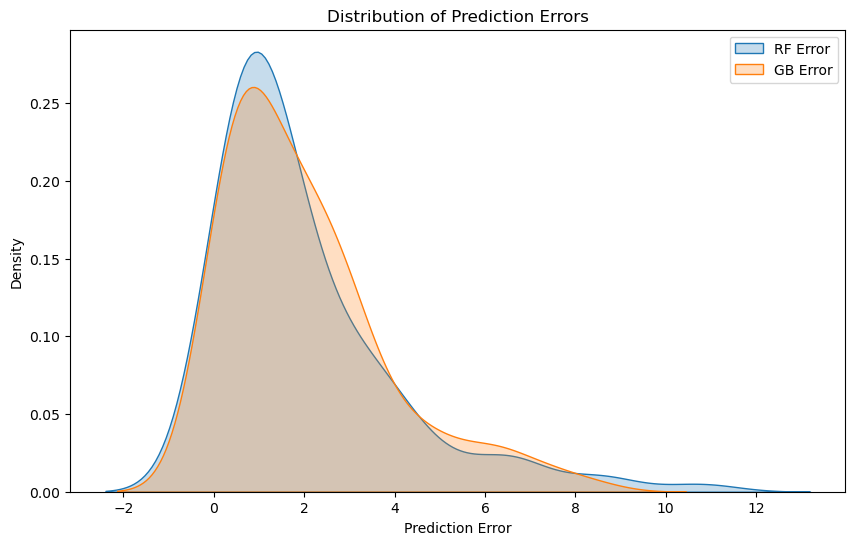

In [82]:
plt.figure(figsize=(10, 6))
sns.kdeplot(error_comparison_df['RF_Error'], label='RF Error', fill=True)
sns.kdeplot(error_comparison_df['GB_Error'], label='GB Error', fill=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.show()